In [1]:
import pandas as pd

# 加载两个 CSV 文件
df1 = pd.read_csv(r"C:\Users\22375\Desktop\东方财富网.csv",encoding='gbk')
df2 = pd.read_csv(r'C:\Users\22375\news1.csv',encoding='utf-8')

df1.head()


,title,link,time
0,爆表！美国5月非农比预期高近50% 美联储年内降息再添变数,https://finance.eastmoney.com/a/20240607309949...,2024年06月07日 20:30
1,央行“18连增”黄金后止步 专家称央行擅长把握机会 后续或仍有增持空间,https://finance.eastmoney.com/a/20240607309942...,2024年06月07日 18:48
2,现货白银跌幅扩大至2.3% 现货黄金跌1.44%,https://finance.eastmoney.com/a/20240607309935...,2024年06月07日 17:23
3,每日龙虎榜 | 期市资金日内净流出 橡胶增仓量位居榜首,https://finance.eastmoney.com/a/20240607309932...,2024年06月07日 16:50
4,精选 | 本周重大资讯回顾 (6/3-6/7),https://finance.eastmoney.com/a/20240607309929...,2024年06月07日 16:30


In [2]:
df2.head()

,title,time
0,美国就业失业双升，降息预期升还是降？,2024年06月08日 21:00
1,美国5月非农就业：多年来最诡异的一次？,2024年06月08日 20:00
2,重磅数据发布，金价突然大跌！美联储降息又悬了？,2024年06月08日 18:15
3,美国非农强劲、中国央行停买，黄金遭“双重打击”！,2024年06月08日 11:39
4,一觉醒来 国际贵金属期货集体暴跌！又一次见证历史,2024年06月08日 08:14


In [3]:
# 合并两个 DataFrame
merged_df = pd.concat([df1, df2], ignore_index=True)

# 按照时间列进行排序
df = merged_df.sort_values(by='time', ascending=False)

# 保存排序后的 DataFrame 到新的 CSV 文件
df.to_csv('data.csv', index=False)

# 显示合并并排序后的 DataFrame 的前几行
df.head()

,title,link,time
1000,美国就业失业双升，降息预期升还是降？,NaN,2024年06月08日 21:00
1001,美国5月非农就业：多年来最诡异的一次？,NaN,2024年06月08日 20:00
1002,重磅数据发布，金价突然大跌！美联储降息又悬了？,NaN,2024年06月08日 18:15
1003,美国非农强劲、中国央行停买，黄金遭“双重打击”！,NaN,2024年06月08日 11:39
1004,一觉醒来 国际贵金属期货集体暴跌！又一次见证历史,NaN,2024年06月08日 08:14


In [4]:
# 删除名为 'link' 的列
df = df.drop(columns=['link'])
df.head()

,title,time
1000,美国就业失业双升，降息预期升还是降？,2024年06月08日 21:00
1001,美国5月非农就业：多年来最诡异的一次？,2024年06月08日 20:00
1002,重磅数据发布，金价突然大跌！美联储降息又悬了？,2024年06月08日 18:15
1003,美国非农强劲、中国央行停买，黄金遭“双重打击”！,2024年06月08日 11:39
1004,一觉醒来 国际贵金属期货集体暴跌！又一次见证历史,2024年06月08日 08:14


In [5]:
# 检查是否有缺失值
missing_values = df.isnull().sum()

# 打印出每列的缺失值数量
print("缺失值统计：")
print(missing_values)

缺失值统计：
title    0
time     0
dtype: int64


In [6]:
df.describe()

,title,time
count,1900,1900
unique,1737,1858
top,期货日历 | 下周待关注的重要数据与事件一览,2024年04月25日 17:28
freq,29,3


In [7]:
# 删除不包含 "金" 的行
df = df[df['title'].str.contains('金')]

In [8]:
# 删除不包含 "?" 的行
df = df[~df['title'].str.contains('？')]

df.head()

,title,time
1003,美国非农强劲、中国央行停买，黄金遭“双重打击”！,2024年06月08日 11:39
1004,一觉醒来 国际贵金属期货集体暴跌！又一次见证历史,2024年06月08日 08:14
1005,5月外汇储备规模上升 央行暂停增持黄金,2024年06月08日 05:47
1007,超过欧元，挑战美元！黄金占全球储备资产高达18%,2024年06月07日 20:56
1008,5月非农远超预期，黄金跳水16美元美指冲高60点,2024年06月07日 20:39


In [9]:
df['title_length'] = df['title'].apply(len)
descriptive_stats = df['title_length'].describe(include='all')
print(descriptive_stats)

count    1251.000000
mean       25.963229
std         6.977123
min         6.000000
25%        22.000000
50%        26.000000
75%        29.000000
max        65.000000
Name: title_length, dtype: float64


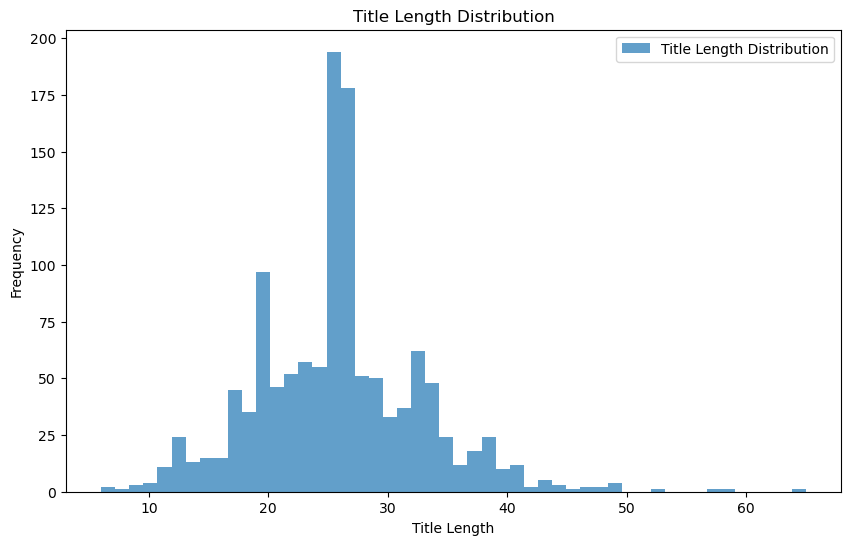

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['title_length'], bins=50, alpha=0.7, label='Title Length Distribution')
plt.title('Title Length Distribution')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [11]:
df.describe()

,title_length
count,1251.000000
mean,25.963229
std,6.977123
min,6.000000
25%,22.000000
50%,26.000000
75%,29.000000
max,65.000000


In [12]:
df.to_csv('clean_news_data1.csv', index=False)
#将数据存储为csv文件

In [13]:
import pandas as pd
import numpy as np
cleaned_data = pd.read_csv(r'C:\Users\22375\clean_news_data1.csv',encoding='utf-8')

In [14]:
import re
import csv

def remove_punctuation(text):
    # 使用正则表达式匹配标点符号，并将其替换为空字符串
    return re.sub(r'[^\w\s]', '', text)

# 读取 CSV 文件
with open(r'C:\Users\22375\clean_news_data1.csv', 'r', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    
    # 新建一个 CSV 文件来保存处理后的数据
    with open('cleaned_file1.csv', 'w', newline='', encoding='utf-8') as cleanedfile:
        fieldnames = reader.fieldnames
        writer = csv.DictWriter(cleanedfile, fieldnames=fieldnames)
        writer.writeheader()
        
        # 逐行处理数据
        for row in reader:
            # 对title列应用remove_punctuation函数
            row['title'] = remove_punctuation(row['title'])
            # 写入处理后的行到新的 CSV 文件
            writer.writerow(row)

print("处理完成！")

处理完成！


In [15]:
import pandas as pd
import numpy as np
cleaned_data1 = pd.read_csv(r'C:\Users\22375\cleaned_file1.csv',encoding='utf-8')
#读取csv数据文件
cleaned_data1.head(10)
#查看前10行数据

,title,time,title_length
0,美国非农强劲中国央行停买黄金遭双重打击,2024年06月08日 11:39,24
1,一觉醒来 国际贵金属期货集体暴跌又一次见证历史,2024年06月08日 08:14,24
2,5月外汇储备规模上升 央行暂停增持黄金,2024年06月08日 05:47,19
3,超过欧元挑战美元黄金占全球储备资产高达18,2024年06月07日 20:56,24
4,5月非农远超预期黄金跳水16美元美指冲高60点,2024年06月07日 20:39,24
5,央行18连增黄金后止步 专家称央行擅长把握机会 后续或仍有增持空间,2024年06月07日 18:48,35
6,央行18连增黄金后止步 专家称央行擅长把握机会 后续或仍有增持空间,2024年06月07日 18:48,35
7,美国债券收益率持续低迷 金价进一步下滑,2024年06月07日 17:27,19
8,现货白银跌幅扩大至23 现货黄金跌144,2024年06月07日 17:23,24
9,每日龙虎榜 期市资金日内净流出 橡胶增仓量位居榜首,2024年06月07日 16:50,27


In [16]:
import jieba
# 定义分词函数
def tokenize_text(text):
    tokens = jieba.lcut(text)  # 使用 jieba 中文分词对文本进行分词
    return ' '.join(tokens)
    
# 对标题列中的文本应用分词函数
cleaned_data1['title_tokens'] = cleaned_data1['title'].apply(tokenize_text)

# 查看前5行数据
cleaned_data1.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\22375\AppData\Local\Temp\jieba.cache
Loading model cost 0.671 seconds.
Prefix dict has been built successfully.


,title,time,title_length,title_tokens
0,美国非农强劲中国央行停买黄金遭双重打击,2024年06月08日 11:39,24,美国 非农 强劲 中国 央行 停买 黄金 遭 双重 打击
1,一觉醒来 国际贵金属期货集体暴跌又一次见证历史,2024年06月08日 08:14,24,一 觉醒 来 国际 贵金属 期货 集体 暴跌 又 一次 见证 历史
2,5月外汇储备规模上升 央行暂停增持黄金,2024年06月08日 05:47,19,5 月 外汇储备 规模 上升 央行 暂停 增持 黄金
3,超过欧元挑战美元黄金占全球储备资产高达18,2024年06月07日 20:56,24,超过 欧元 挑战 美元 黄金 占 全球 储备 资产 高达 18
4,5月非农远超预期黄金跳水16美元美指冲高60点,2024年06月07日 20:39,24,5 月 非农 远超 预期 黄金 跳水 16 美元 美指 冲高 60 点


In [17]:
# 加载停用词表
stopwords = set()
with open(r"C:\Users\22375\Desktop\data\stopwords.txt", 'r', encoding='utf-8') as f:
    for line in f:
        stopwords.add(line.strip())

# 定义分词函数
def tokenize_text(text):
    tokens = jieba.lcut(text)  # 使用 jieba 中文分词对文本进行分词
    return ' '.join(tokens)  # 用空格将分词结果连接成字符串

# 定义去停用词函数
def remove_stopwords(text):
    words = text.split()  # 将字符串分割成单词列表
    filtered_words = [word for word in words if word not in stopwords]  # 去除停用词
    return ' '.join(filtered_words)  # 重新组合成字符串，用空格隔开

# 假设 cleaned_data1 是你的 DataFrame，其中包含了一个名为 'title_tokens' 的列
# 对标题列中的文本应用去停用词函数，并创建一个新的列 'title_tokens_clean' 来保存处理后的结果
cleaned_data1['title_tokens_clean'] = cleaned_data1['title_tokens'].apply(remove_stopwords)

# 查看前30行数据
cleaned_data1

# 保存结果到新的 CSV 文件
cleaned_data1.to_csv("cleaned_data2.csv", index=False)